##Loading Data

In [3]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2023-01-04 10:39:53--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-01-04 10:39:53--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30a1f7f03a8d84cf9968f5d724.dl.dropboxusercontent.com/cd/0/inline/Bz75PN2nq5yHJZfemnHyDT2FaGCQCRJKKCEmy_fm0dlTD7YJsfG2piTkvPRRhjEPFNQoYdoJHy9UoB1XpIzcZQDU37BRZ3IA4CVaw3zdraeHhmnBZGZoBRP3UINSxOn0pO_yzFtYlX5SAgEBJSz50rH3F4sGeJFKOTzxu74lZF4Zug/file# [following]
--2023-01-04 10:39:53--  https://uc30a1f7f03a8d84cf9968f5d724.dl.dropboxusercontent.com/cd/0/inline/Bz75PN2nq5yHJZfemnHyDT2FaGCQCRJKKCEmy_fm0dlTD7YJsfG2piTkvPRRhjEPFNQoYdoJHy9UoB

In [4]:
!unzip dataset.zip?dl\=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

##importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

## Setting up for training

In [7]:
model = MobileNet(input_shape = (224,224,3), include_top = False, weights='imagenet')

In [9]:
for layer in model.layers:
  layer.trainable = False

z = Flatten()(model.output)
z = Dense(units = 7,activation = 'softmax')(z)

ed_model = Model(model.input,z)

In [10]:
ed_model.compile(optimizer = 'adam', loss = categorical_crossentropy, metrics=['accuracy'])

## Building Train and Test Dataset

In [11]:
train_setting = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255
)

train_data = train_setting.flow_from_directory(
    directory = "/content/train",
    target_size = (224,224),
    batch_size = 32,
)

train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [12]:
test_setting = ImageDataGenerator(rescale = 1./255)

test_data = test_setting.flow_from_directory(directory="/content/test",
                                             target_size=(224,224),
                                             batch_size = 32,

          )

Found 7178 images belonging to 7 classes.


##Setting up early Stopping and Check Point for Fitting Data into Our Model

In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_accuracy',min_delta = 0, patience = 5, verbose=1, mode='auto')
model_cp = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')


callbacks = [early_stop,model_cp]


## Fitting Model

In [14]:
# hist - > history
hist = ed_model.fit_generator(train_data, 
                           steps_per_epoch = 10,
                           epochs = 30,
                           validation_data = test_data,
                           validation_steps = 5,
                           callbacks = [early_stop,model_cp])

<ipython-input-14-eb789541add7>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = ed_model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 15.9505 - accuracy: 0.1875
Epoch 1: val_accuracy improved from -inf to 0.36250, saving model to best_model.h5
10/10 [==============================] - 24s 2s/step - loss: 15.9505 - accuracy: 0.1875 - val_loss: 11.0630 - val_accuracy: 0.3625
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 10.5338 - accuracy: 0.3281
Epoch 2: val_accuracy improved from 0.36250 to 0.37500, saving model to best_model.h5
10/10 [==============================] - 20s 2s/step - loss: 10.5338 - accuracy: 0.3281 - val_loss: 9.6240 - val_accuracy: 0.3750
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 7.4189 - accuracy: 0.3969
Epoch 3: val_accuracy did not improve from 0.37500
10/10 [==============================] - 21s 2s/step - loss: 7.4189 - accuracy: 0.3969 - val_loss: 8.7768 - val_accuracy: 0.3500
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 7.2898 - accuracy: 0.3281
Epoch 4: val

### Loading the best fit model

In [15]:
from keras.models import load_model
ed_model =  load_model("/content/best_model.h5")

In [16]:
h_keys = hist.history
h_keys.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

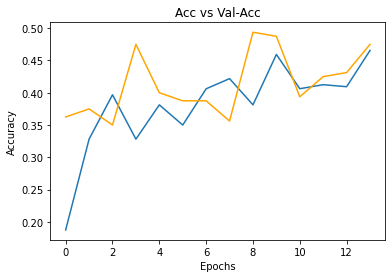

In [17]:
plt.plot(h_keys['accuracy'])
plt.plot(h_keys['val_accuracy'], c='orange')
plt.title('Acc vs Val-Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Predicting Emotion through Test Set

In [18]:
random_set = []

path = '/content/test/'
emotion_set = ['angry','disgust','fear','happy','neutral','sad','surprise']

for each in emotion_set:
  path = '/content/test/'
  path = path+each+'/'
  

In [19]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

/content/test/surprise/PrivateTest_35458201.jpg
surprise
1/1 [==============================] - 1s 630ms/step
Preicted Result is  surprise


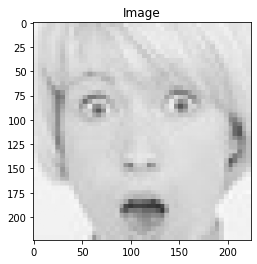

/content/test/disgust/PublicTest_42217610.jpg
disgust
1/1 [==============================] - 0s 63ms/step
Preicted Result is  angry


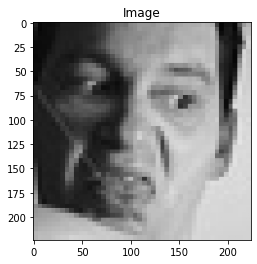

/content/test/sad/PrivateTest_13472479.jpg
sad
1/1 [==============================] - 0s 76ms/step
Preicted Result is  sad


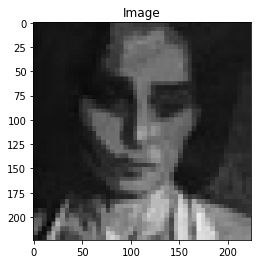

/content/test/neutral/PrivateTest_40968782.jpg
neutral
1/1 [==============================] - 0s 67ms/step
Preicted Result is  sad


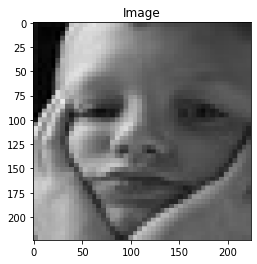

/content/test/surprise/PublicTest_80135522.jpg
surprise
1/1 [==============================] - 0s 73ms/step
Preicted Result is  surprise


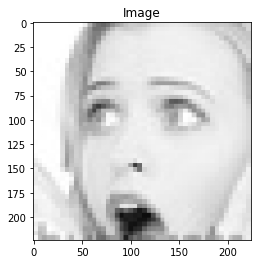

/content/test/neutral/PrivateTest_14704134.jpg
neutral
1/1 [==============================] - 0s 64ms/step
Preicted Result is  angry


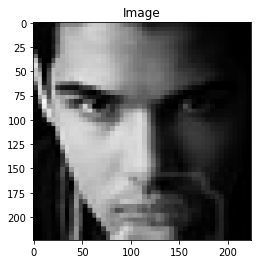

/content/test/neutral/PrivateTest_65693325.jpg
neutral
1/1 [==============================] - 0s 72ms/step
Preicted Result is  angry


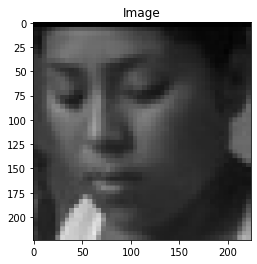

/content/test/neutral/PrivateTest_60797107.jpg
neutral
1/1 [==============================] - 0s 65ms/step
Preicted Result is  neutral


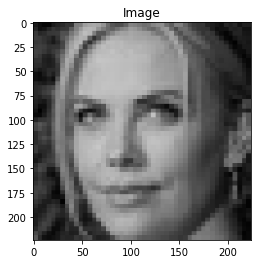

/content/test/neutral/PrivateTest_97560128.jpg
neutral
1/1 [==============================] - 0s 64ms/step
Preicted Result is  neutral


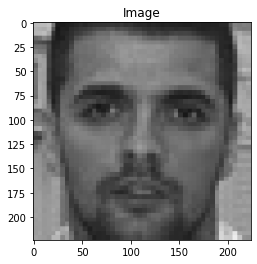

/content/test/angry/PublicTest_28415725.jpg
angry
1/1 [==============================] - 0s 67ms/step
Preicted Result is  sad


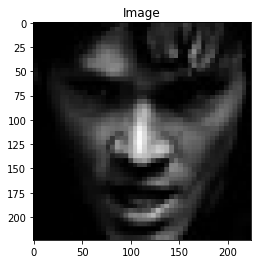

In [20]:
import os
import random

# Set the path to the folder containing the subfolders
for i in range(0,10):
  path = '/content/test/'

  # Get a list of all subfolders in the path
  subfolders = [f.path for f in os.scandir(path) if f.is_dir()]

  # Select a random subfolder
  subfolder = random.choice(subfolders)

  # to get the name of the selected subfolder
  subfolder_name = os.path.basename(subfolder)

  # Get a list of all files in the subfolder
  files = [f.path for f in os.scandir(subfolder) if f.is_file()]

  # Select a random file
  random_file = random.choice(files)

  # Print the file path
  print(random_file)
  print(subfolder_name)

  path = random_file
  img = load_img(path,target_size = (224,224))

  i = img_to_array(img)/255
  input_arr = np.array([i])
  input_arr.shape

  pred_res = np.argmax(ed_model.predict(input_arr))

  print("Preicted Result is ",op[pred_res])
  plt.imshow(input_arr[0])
  plt.title("Image")
  plt.show()

## Using Webcam to Predict Output

In [18]:
# import requests

# url = "https://c293-2401-4900-56aa-b2f-a406-9203-293e-2ab8.in.ngrok.io/webcam"
# response = requests.get(url)

In [20]:
# import necessary packages
import cv2
from google.colab.patches import cv2_imshow

# create a video capture object from the webcam stream
cap = cv2.VideoCapture("/content/Sample ED Video.mp4")

# loop over the frames from the video stream
while True:
    # grab the frame from the video stream
    _, frame = cap.read()

    # show the output frame
    cv2_imshow(frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
cap.release()


Output hidden; open in https://colab.research.google.com to view.

In [23]:
import cv2

# Load the video file
video = cv2.VideoCapture('/content/Sample ED Video.mp4')

# Extract frames from the video
while video.isOpened():
    # Read the next frame
    success, frame = video.read()

    if success:
        # Process the frame using your trained CV model
        # (e.g., detect objects, classify images, etc.)

        # Resize the data to match the expected input shape of the model
        # resized_data = cv2.resize(video, (224, 224))

        # Feed the resized data into the model
        # predictions = model.predict(resized_data)
        processed_frame = ed_model.predict(video)

        # Display the processed frame
        cv2_imshow('Frame', processed_frame)
    else:
        break

# Release the video capture
video.release()
cv2.destroyAllWindows()


ValueError: ignored

In [27]:
# import necessary packages
import cv2
import imutils
from google.colab.patches import cv2_imshow

# initialize the video stream and allow the camera sensor to warm up
print("[INFO] starting video stream...")
vs = cv2.VideoCapture("/content/Sample ED Video.mp4")

# loop over the frames from the video stream
while True:
	# grab the frame from the video stream and resize it
	_, frame = vs.read()
	
	# frame = imutils.resize(frame, (224,224))

	# # predict the label and display it
	resized_data = cv2.resize(frame, (224, 224))
	prediction = ed_model.predict(resized_data)
	cv2.putText(frame, prediction, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

	# # show the output frame
	cv2_imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF

	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.release()


[INFO] starting video stream...


ValueError: ignored